In [1]:
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from keras import layers
from keras.models import Sequential

import pandas as pd

import re
import tqdm
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading dataset
df = pd.read_csv('TrainC.csv')  
#val_df = pd.read_excel('val.xlsx')
test_df = pd.read_csv('TestC.csv')

In [3]:
train_df=df.sample(frac = 0.25)

print('size of training set: %s' % (len(train_df['Utterance'])))
print('size of validation set: %s' % (len(test_df ['Utterance'])))


train_df.head(10)

size of training set: 3775
size of validation set: 3100


,Utterance,Intent
6696,what number do you get when you roll one six s...,66
3823,have i have been spending a lot of money on shoes,38
133,please send ten dollars from bank of america t...,1
9540,i really need to change my pin number for my a...,95
2045,add groceries to my shopping list as i am out,20
10783,let me know my current location,107
4029,what kind of credit score do i have,40
12240,tell me how to locate the interest rate for my...,122
6419,you can unsync from my phone now,64
6979,set reminder to feed cat tonight at 6pm,69


In [4]:
train_df["Intent"].value_counts()

92     36
111    34
58     34
69     33
110    33
       ..
44     17
125    17
72     17
80     16
39     15
Name: Intent, Length: 151, dtype: int64

In [5]:
test_df["Intent"].value_counts()

150    100
95      20
97      20
98      20
99      20
      ... 
51      20
52      20
53      20
54      20
75      20
Name: Intent, Length: 151, dtype: int64

In [6]:
from collections import Counter
Counter(test_df["Intent"])

Counter({0: 20,
         1: 20,
         2: 20,
         3: 20,
         4: 20,
         5: 20,
         6: 20,
         7: 20,
         8: 20,
         9: 20,
         10: 20,
         11: 20,
         12: 20,
         13: 20,
         14: 20,
         15: 20,
         16: 20,
         17: 20,
         18: 20,
         19: 20,
         20: 20,
         21: 20,
         22: 20,
         23: 20,
         24: 20,
         25: 20,
         26: 20,
         27: 20,
         28: 20,
         29: 20,
         30: 20,
         31: 20,
         32: 20,
         33: 20,
         34: 20,
         35: 20,
         36: 20,
         37: 20,
         38: 20,
         39: 20,
         40: 20,
         41: 20,
         42: 20,
         43: 20,
         44: 20,
         45: 20,
         46: 20,
         47: 20,
         48: 20,
         49: 20,
         50: 20,
         51: 20,
         52: 20,
         53: 20,
         54: 20,
         55: 20,
         56: 20,
         57: 20,
         58: 20,
       

In [7]:
from collections import Counter
Counter(train_df["Intent"])

Counter({66: 22,
         38: 24,
         1: 24,
         95: 27,
         20: 21,
         107: 25,
         40: 25,
         122: 22,
         64: 30,
         69: 33,
         41: 28,
         65: 26,
         83: 25,
         5: 27,
         19: 27,
         100: 27,
         59: 24,
         81: 19,
         138: 29,
         42: 23,
         60: 26,
         97: 25,
         131: 26,
         123: 26,
         140: 25,
         88: 17,
         117: 23,
         119: 26,
         22: 20,
         144: 30,
         2: 22,
         52: 20,
         29: 32,
         31: 23,
         58: 34,
         62: 31,
         74: 23,
         63: 24,
         11: 22,
         21: 19,
         32: 22,
         15: 21,
         89: 28,
         71: 23,
         135: 28,
         112: 31,
         46: 19,
         78: 20,
         99: 28,
         91: 27,
         28: 22,
         90: 24,
         76: 28,
         10: 28,
         124: 22,
         33: 24,
         134: 32,
         104: 28,
  

In [8]:
x_train, x_test, y_train, y_test = train_df["Utterance"], test_df["Utterance"], train_df["Intent"],test_df["Intent"]

In [9]:
EPOCHS= 50
opt= tf.keras.optimizers.Adam(learning_rate=0.001)

In [10]:
#converting text to vectors via tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)
TEST = tokenizer.texts_to_sequences(test_df["Utterance"]) 

vocab_size = len(tokenizer.word_index) + 1 

In [11]:
#calculating max length of the vector
lens_train = [len(i) for i in X_train]
lens_test = [len(i) for i in X_test]
lens = lens_train + lens_test

maxlen = np.max(lens)

print('Max len:', maxlen)

Max len: 23


In [12]:
#Zero padding every vector so that they are the same size
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
TEST = pad_sequences(TEST, padding='post', maxlen=maxlen)

In [13]:
#One Hot Encoding integer labels
dummy_y_test = np_utils.to_categorical(y_test)
dummy_y_train = np_utils.to_categorical(y_train)

In [14]:
#reading fasttext
def get_embedding_vectors(tokenizer, dim=300):
    embedding_index = {}
    with open('glove.840B.300d.txt','r', encoding="cp437", errors='ignore') as f:
        for line in tqdm.tqdm(f, "Reading Glove"):
            values = line.split()
            word = ''.join(values[:-300])
            vectors = np.asarray(values[-300:], dtype='float32')
            embedding_index[word] = vectors

    word_index = tokenizer.word_index
    embedding_matrix = np.zeros((len(word_index)+1, dim))
    for word, i in word_index.items():
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            # words not found will be 0s
            embedding_matrix[i] = embedding_vector
          
    return embedding_matrix

In [15]:
embedding_matrix = get_embedding_vectors(tokenizer)

Reading Glove: 2196018it [05:13, 6999.53it/s] 


In [16]:
embedding_dim = 300
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights = [embedding_matrix], input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50, return_sequences=True)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(151, activation='softmax')
])
model.compile(optimizer=opt, loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 23, 300)           837600    
                                                                 
 bidirectional (Bidirectiona  (None, 23, 100)          140400    
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 151)               7701      
                                                                 
Total params: 1,018,451
Trainable params: 1,018,451
Non-trainable params: 0
______________________________________________

In [17]:
history = model.fit(X_train, dummy_y_train, epochs=EPOCHS, verbose=1, validation_data=(X_test, dummy_y_test), batch_size=8) 
loss, accuracy = model.evaluate(X_train, dummy_y_train, verbose=0)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, dummy_y_test, verbose=0)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/50
472/472 [==============================] - 36s 60ms/step - loss: 4.5649 - accuracy: 0.0323 - val_loss: 3.8456 - val_accuracy: 0.0735
Epoch 2/50
472/472 [==============================] - 26s 55ms/step - loss: 3.2997 - accuracy: 0.1221 - val_loss: 3.1484 - val_accuracy: 0.1323
Epoch 3/50
472/472 [==============================] - 25s 53ms/step - loss: 2.5336 - accuracy: 0.2411 - val_loss: 2.5998 - val_accuracy: 0.2677
Epoch 4/50
472/472 [==============================] - 26s 55ms/step - loss: 1.8725 - accuracy: 0.4048 - val_loss: 2.3131 - val_accuracy: 0.3758
Epoch 5/50
472/472 [==============================] - 27s 57ms/step - loss: 1.3217 - accuracy: 0.5764 - val_loss: 2.0932 - val_accuracy: 0.4710
Epoch 6/50
472/472 [==============================] - 27s 56ms/step - loss: 0.9024 - accuracy: 0.7282 - val_loss: 1.9352 - val_accuracy: 0.5558
Epoch 7/50
472/472 [==============================] - 26s 56ms/step - loss: 0.5869 - accuracy: 0.8363 - val_loss: 1.8535 - val_accuracy:

In [18]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

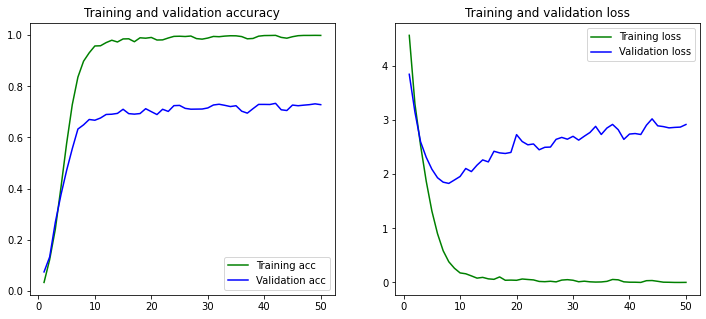

In [19]:
PlotGraph(history)